# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# EDA

In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In The Data TotalCharges Column Is Float Datatype But It Show Object Datatype

In [7]:
# change datatype for 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'].dtypes

dtype('float64')

In [8]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

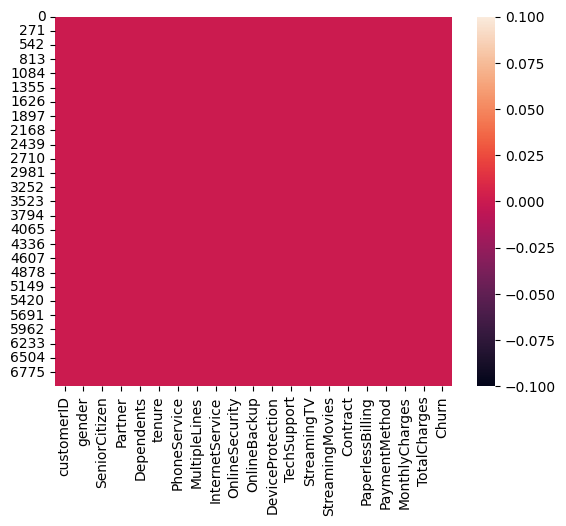

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.drop('customerID', axis = 1, inplace=True)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


# Encode Categorical Variables & Scale Numeric Features

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separate target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)  # 'Yes' -> 1, 'No' -> 0

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include=['int64','float64']).columns

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Scale numeric columns
scaler = StandardScaler()
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])

X_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.994242,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,-0.439916,0.066327,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,-0.439916,-1.236724,-0.362660,-0.959674,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,-0.439916,0.514251,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-0.439916,-1.236724,0.197365,-0.940470,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)

# Basic evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7501774308019872
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



### Full Evaluation

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression Detailed Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))

Logistic Regression Detailed Evaluation
Accuracy: 0.7501774308019872
Precision: 0.5176470588235295
Recall: 0.8257372654155496
F1-score: 0.6363636363636364
ROC-AUC: 0.86206356682228


# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7927608232789212
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.45      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



### Full Evaluation

In [17]:
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

print("Random Forest Detailed Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

Random Forest Detailed Evaluation
Accuracy: 0.7927608232789212
Precision: 0.6575875486381323
Recall: 0.45308310991957107
F1-score: 0.5365079365079365
ROC-AUC: 0.8425036488039168


# Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8147622427253371
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



### Full Evaluation

In [19]:
y_proba_gb = gb_clf.predict_proba(X_test)[:, 1]

print("Gradient Boosting Detailed Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1-score:", f1_score(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_gb))

Gradient Boosting Detailed Evaluation
Accuracy: 0.8147622427253371
Precision: 0.6866666666666666
Recall: 0.5522788203753352
F1-score: 0.612184249628529
ROC-AUC: 0.8594667053112095


# ROC Curve Comparison

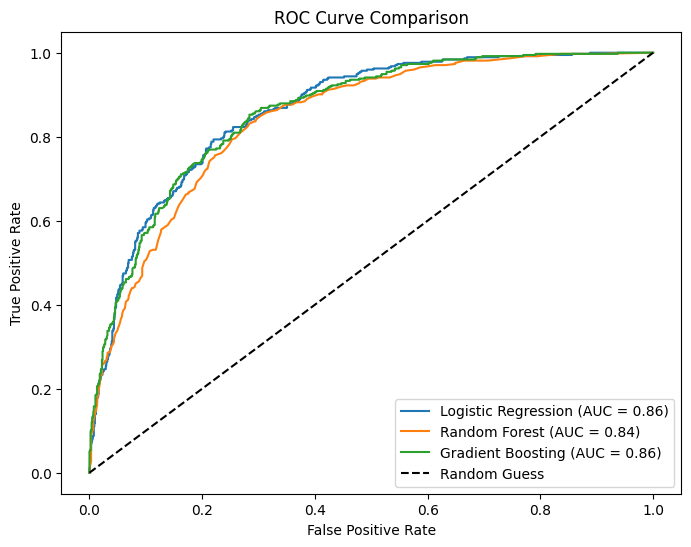

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_lr):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_score(y_test, y_proba_gb):.2f})")

# Plot random baseline
plt.plot([0,1], [0,1], "k--", label="Random Guess")

# Labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

### Comparison

In [21]:
import pandas as pd

# Collect results into a dictionary
results = {
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_gb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_gb)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_gb)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_proba_lr),
        roc_auc_score(y_test, y_proba_rf),
        roc_auc_score(y_test, y_proba_gb)
    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display neatly
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0  Logistic Regression  0.750177   0.517647  0.825737  0.636364  0.862064
1        Random Forest  0.792761   0.657588  0.453083  0.536508  0.842504
2    Gradient Boosting  0.814762   0.686667  0.552279  0.612184  0.859467


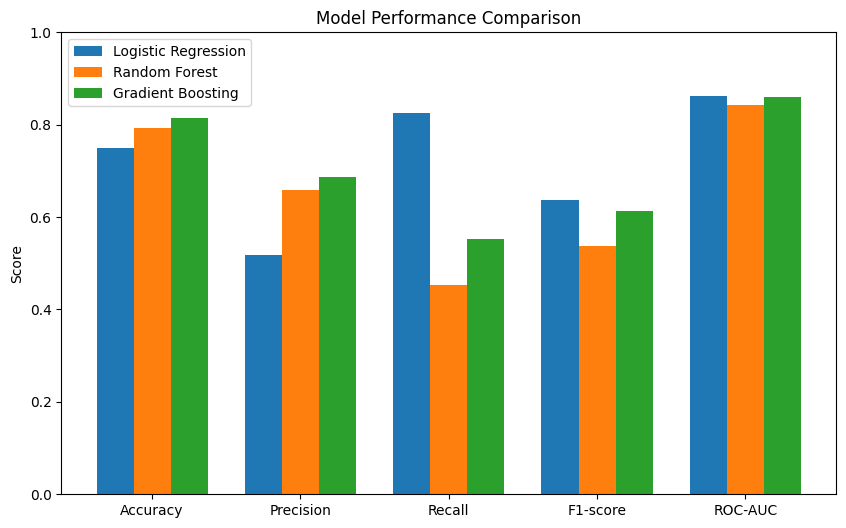

In [22]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    "Accuracy": [0.750177, 0.792761, 0.814762],
    "Precision": [0.517647, 0.657588, 0.686667],
    "Recall": [0.825737, 0.453083, 0.552279],
    "F1-score": [0.636364, 0.536508, 0.612184],
    "ROC-AUC": [0.862064, 0.842504, 0.859467]
})

# Metrics to plot
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]

# Set up positions
x = np.arange(len(metrics))  # metric positions
width = 0.25                 # bar width

# Plot bars for each model
plt.figure(figsize=(10,6))
plt.bar(x - width, results.loc[0, metrics], width, label="Logistic Regression")
plt.bar(x, results.loc[1, metrics], width, label="Random Forest")
plt.bar(x + width, results.loc[2, metrics], width, label="Gradient Boosting")

# Labels and formatting
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.ylim(0, 1)  # since metrics are between 0 and 1
plt.show()

# Feature Importance

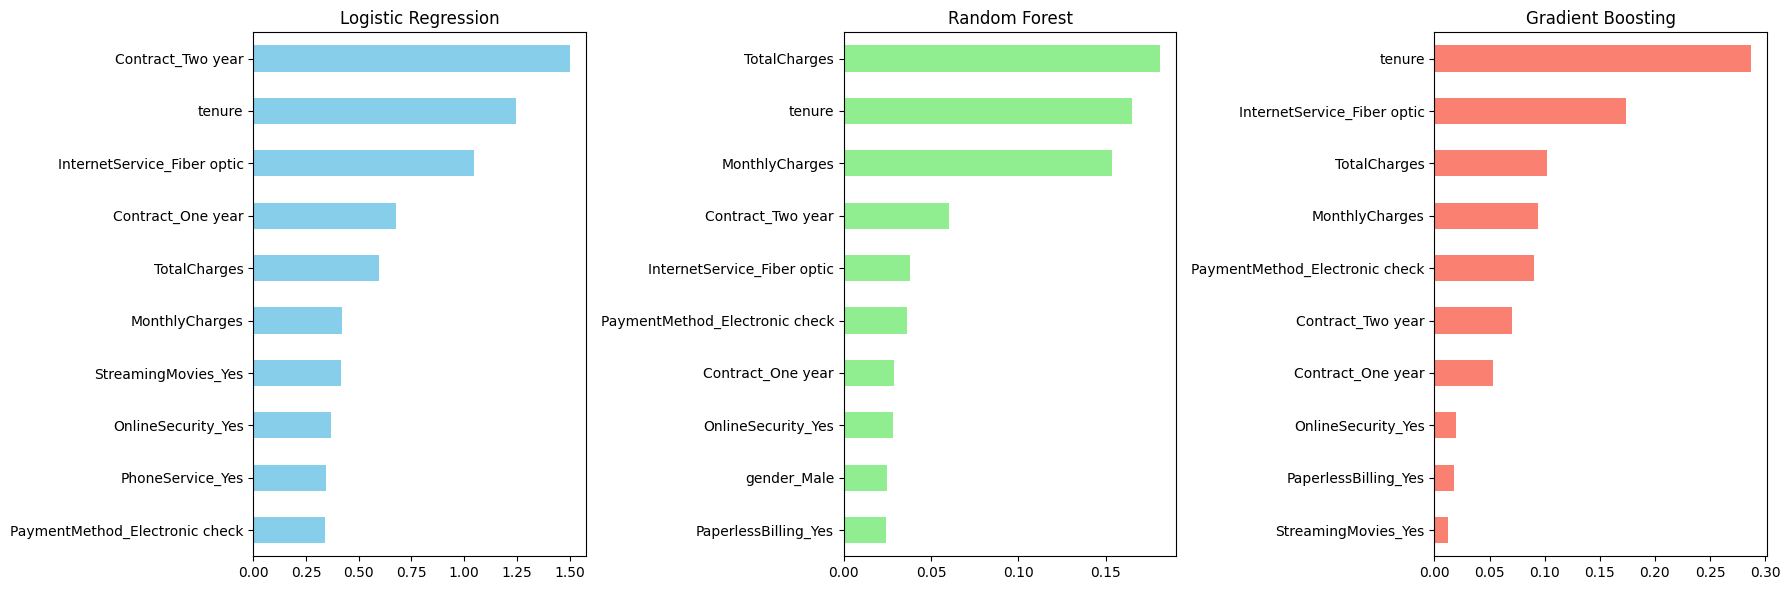

In [38]:
# Logistic Regression Coefficients
coef = pd.Series(np.abs(log_reg.coef_[0]), index=X_train.columns).sort_values(ascending=False).head(10)

# Random Forest Feature Importance
rf_imp = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)

# Gradient Boosting Feature Importance
gb_imp = pd.Series(gb_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)

# Plot all three
fig, axes = plt.subplots(1,3, figsize=(18,6))

coef.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Logistic Regression')
axes[0].invert_yaxis()

rf_imp.plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_title('Random Forest')
axes[1].invert_yaxis()

gb_imp.plot(kind='barh', ax=axes[2], color='salmon')
axes[2].set_title('Gradient Boosting')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()